In [53]:
# Import libraries
import pandas as pd
import numpy as np

# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
train_data = pd.read_csv("datasets/train.csv")
test_data = pd.read_csv("datasets/test.csv")

In [55]:
# Separate features from labels
y = train_data.SalePrice              
X_train = train_data.drop(['SalePrice'], axis=1)

In [59]:
features = pd.concat([X_train, test_data])

In [60]:
features_list = list(features)

In [63]:
# Categorise features
# Features could either describe the building, space(area) or location(environment)

building_feature_list = "MiscVal MiscFeature Fence PoolQC PavedDrive GarageCond GarageQual GarageCars GarageFinish GarageYrBlt GarageType FireplaceQu Fireplaces Functional TotRmsAbvGrd KitchenQual Kitchen Bedroom HalfBath FullBath BsmtHalfBath Electrical CentralAir HeatingQC Heating BsmtFinType2 BsmtFinType1 BsmtCond ExterCond Foundation ExterQual MasVnrArea MasVnrType Exterior2nd Exterior1st RoofMatl RoofStyle YearRemodAdd YearBuilt MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig LandSlope BldgType HouseStyle OverallQual OverallCond".split(" ")
space_feature_list = "PoolArea ScreenPorch 3SsnPorch EnclosedPorch WoodDeckSF OpenPorchSF GarageArea GrLivArea LowQualFinSF 2ndFlrSF 1stFlrSF BsmtUnfSF BsmtFinSF2 TotalBsmtSF BsmtFinSF1 BsmtQual MasVnrArea LotFrontage LotArea".split(" ")
location_feature_list = "Alley Neighborhood Condition1 Condition2".split(" ") 

# Sale Condition and Sale Type may cause leakage

In [48]:
# MSSubClass
X_train.describe()["MSSubClass"]

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

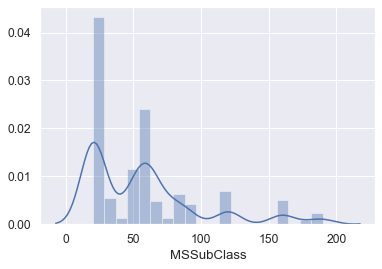

In [49]:
# MSSubClass
sns.distplot(X_train["MSSubClass"])

In [39]:
X_train["MSSubClass"].value_counts()/X_train["MSSubClass"].value_counts().sum()

# NO 150 

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

In [50]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

zones = X_train["MSZoning"]

encoder.fit_transform(zones)

array([3, 3, 3, ..., 3, 3, 3])

In [52]:
zones, X_train["MSZoning"]

(0       RL
 1       RL
 2       RL
 3       RL
 4       RL
         ..
 1455    RL
 1456    RL
 1457    RL
 1458    RL
 1459    RL
 Name: MSZoning, Length: 1460, dtype: object,
 0       RL
 1       RL
 2       RL
 3       RL
 4       RL
         ..
 1455    RL
 1456    RL
 1457    RL
 1458    RL
 1459    RL
 Name: MSZoning, Length: 1460, dtype: object)

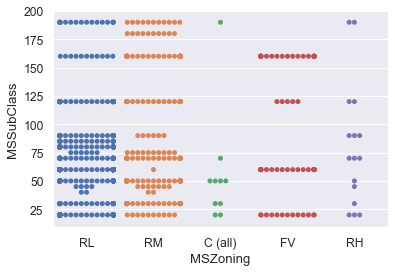

In [51]:
sns.swarmplot( X_train["MSZoning"], X_train["MSSubClass"])

In [ ]:
sns.distplot(X_train.groupby("MSZoning"))

In [ ]:
X_train.groupby("MSSubClass")

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES


## Feature Analysis

**First look for suitable features which are strongly correlated with SalePrice**

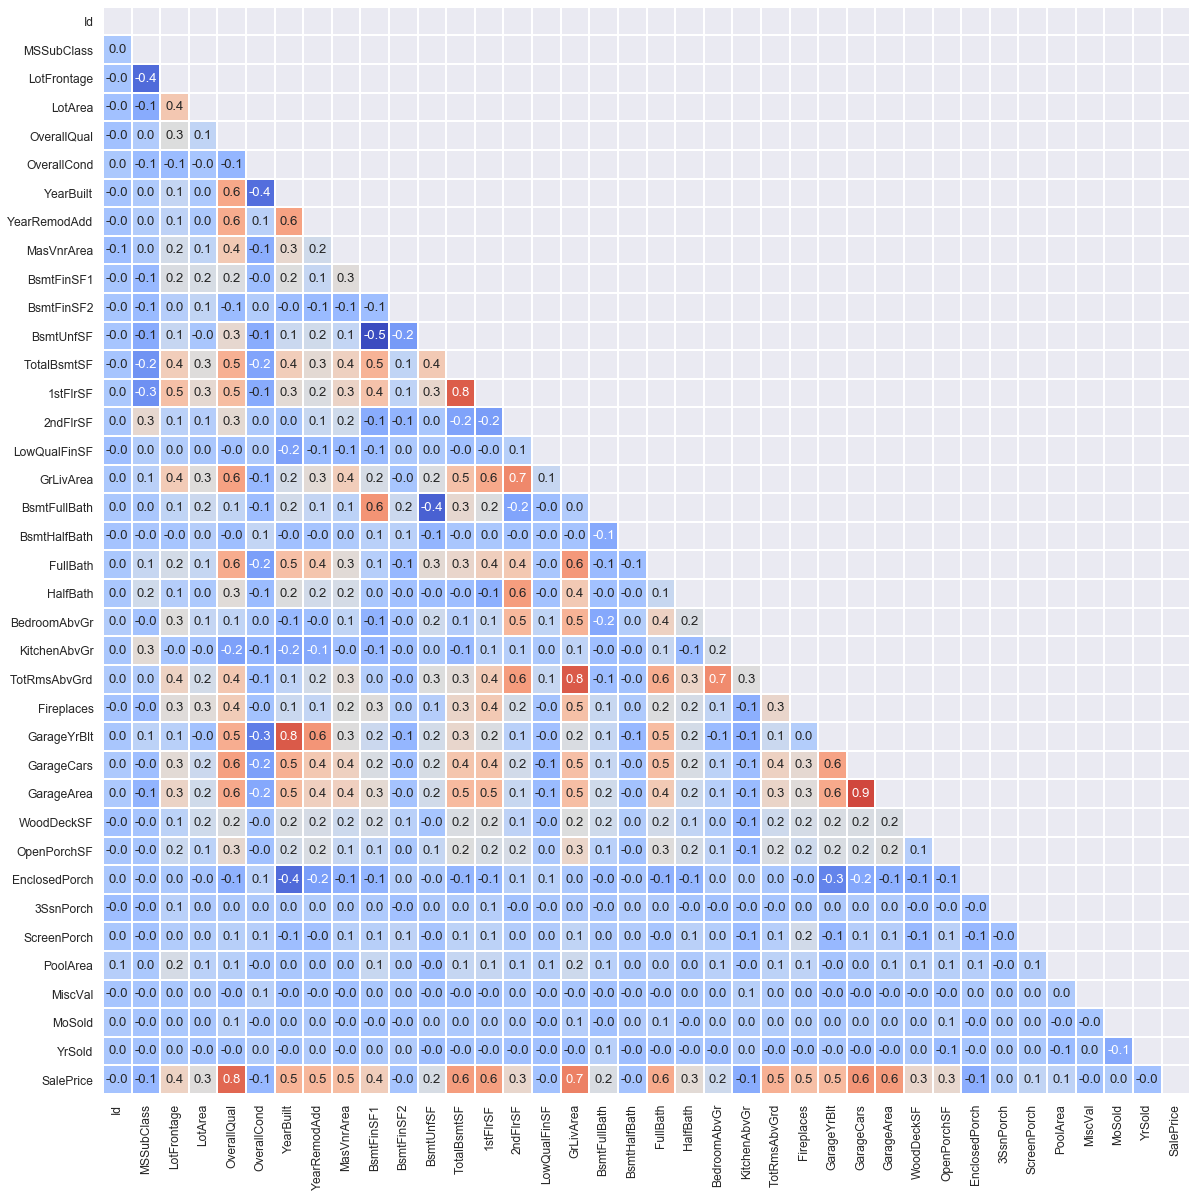

In [5]:
# Correlation analysis
correlation_df = train_data.corr()

# Set font_scale
sns.set(font_scale=1.1)

# Set plot size
plt.figure(figsize=(20, 20))

# Define a mask to show only the upper triangular matrix of the correlation matrix
mask = np.triu(correlation_df.corr())

# Use a heatmap to analyse correlation
sns.heatmap(correlation_df,
            fmt='.1f',
            annot=True,
            cmap="coolwarm",
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)


# Show plot as a diagram rather than an object
plt.show()

In [7]:
# Concatenate features from both testing and training datasets
features = pd.concat([train_data, test_data]).reset_index(drop=True)
print(features.shape)

(2919, 81)


In [8]:
from matplotlib.ticker import MaxNLocator

def srt_box(y, df):
    
    '''A function for displaying categorical variables.'''
    
    fig, axes = plt.subplots(14, 3, figsize=(25, 80))
    axes = axes.flatten()
    
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for i, j in zip(categorical_columns, axes):

        sortd = df.groupby([i])[y].median().sort_values(ascending=False)
        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    palette='plasma',
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()

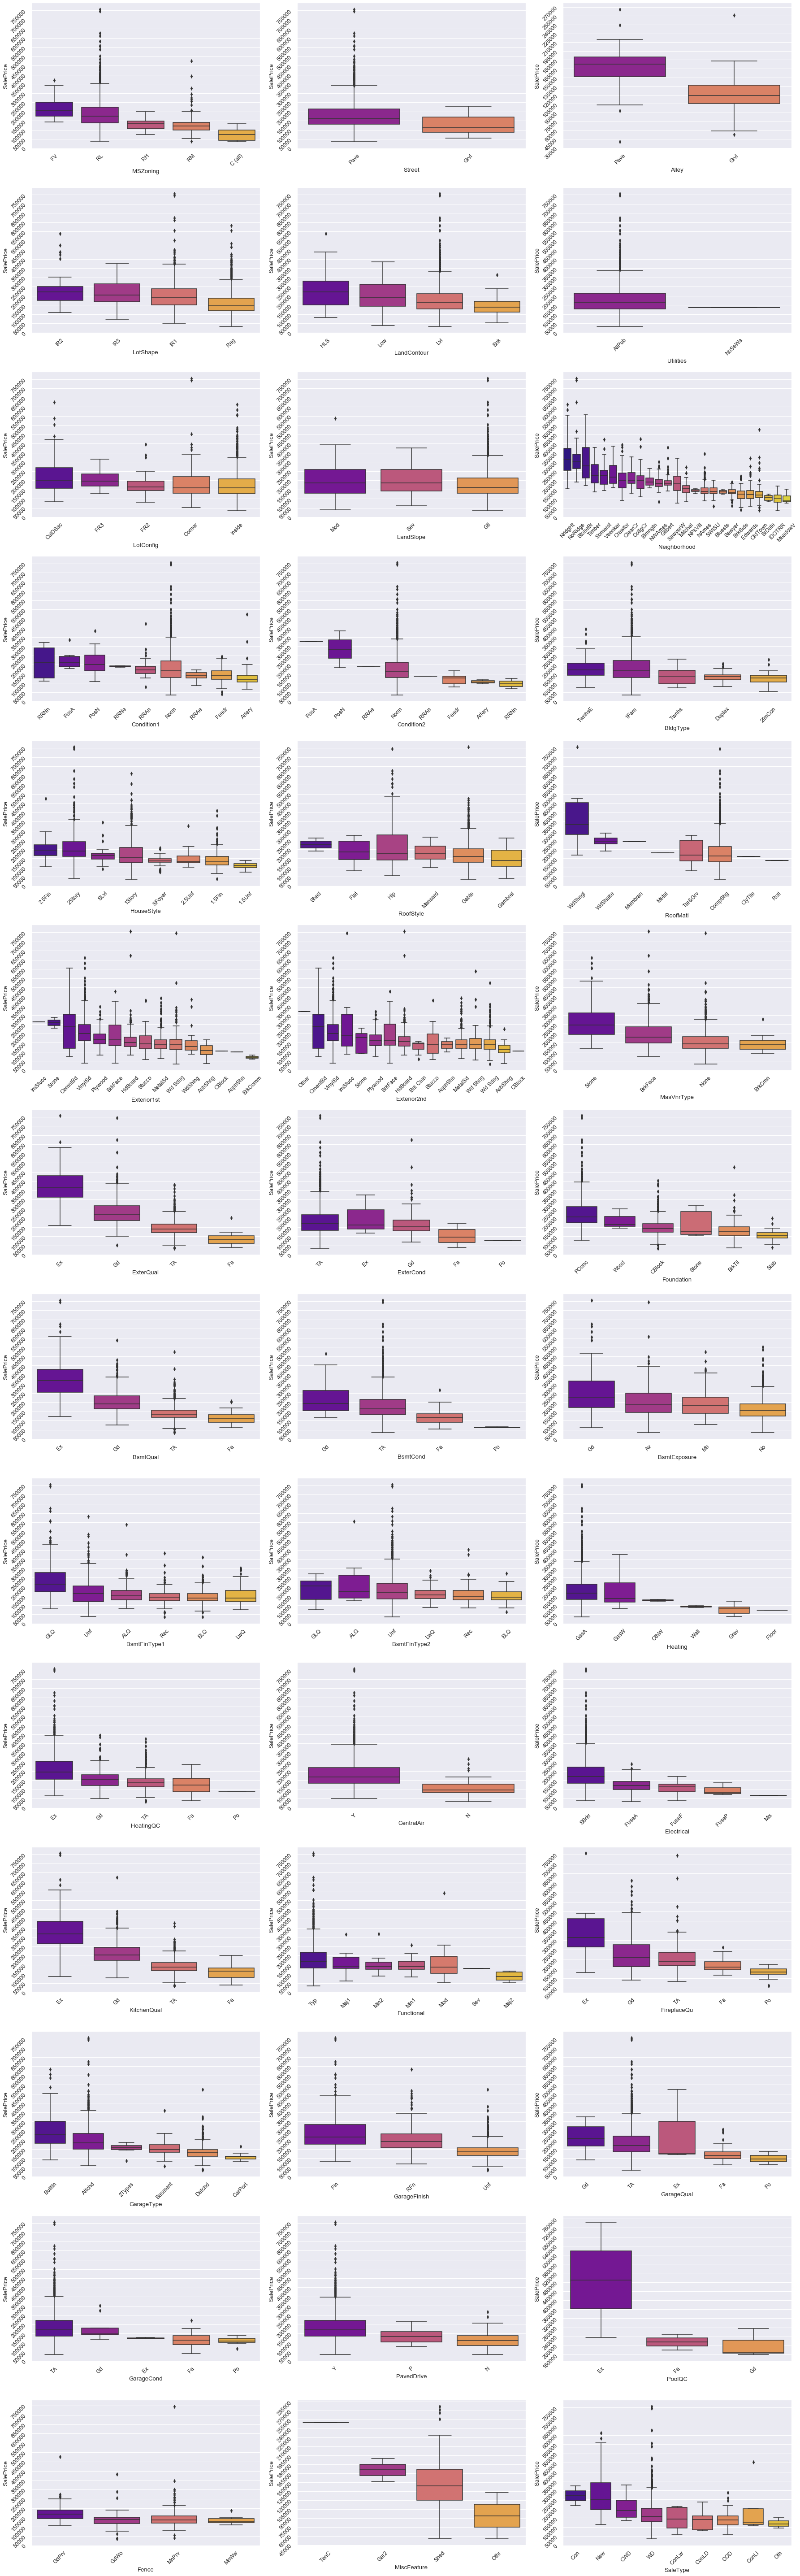

In [9]:
srt_box("SalePrice", train_data)

In [10]:
# Plotting numerical features with polynomial order to detect outliers by eye.

def srt_reg(y, df):
    fig, axes = plt.subplots(12, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


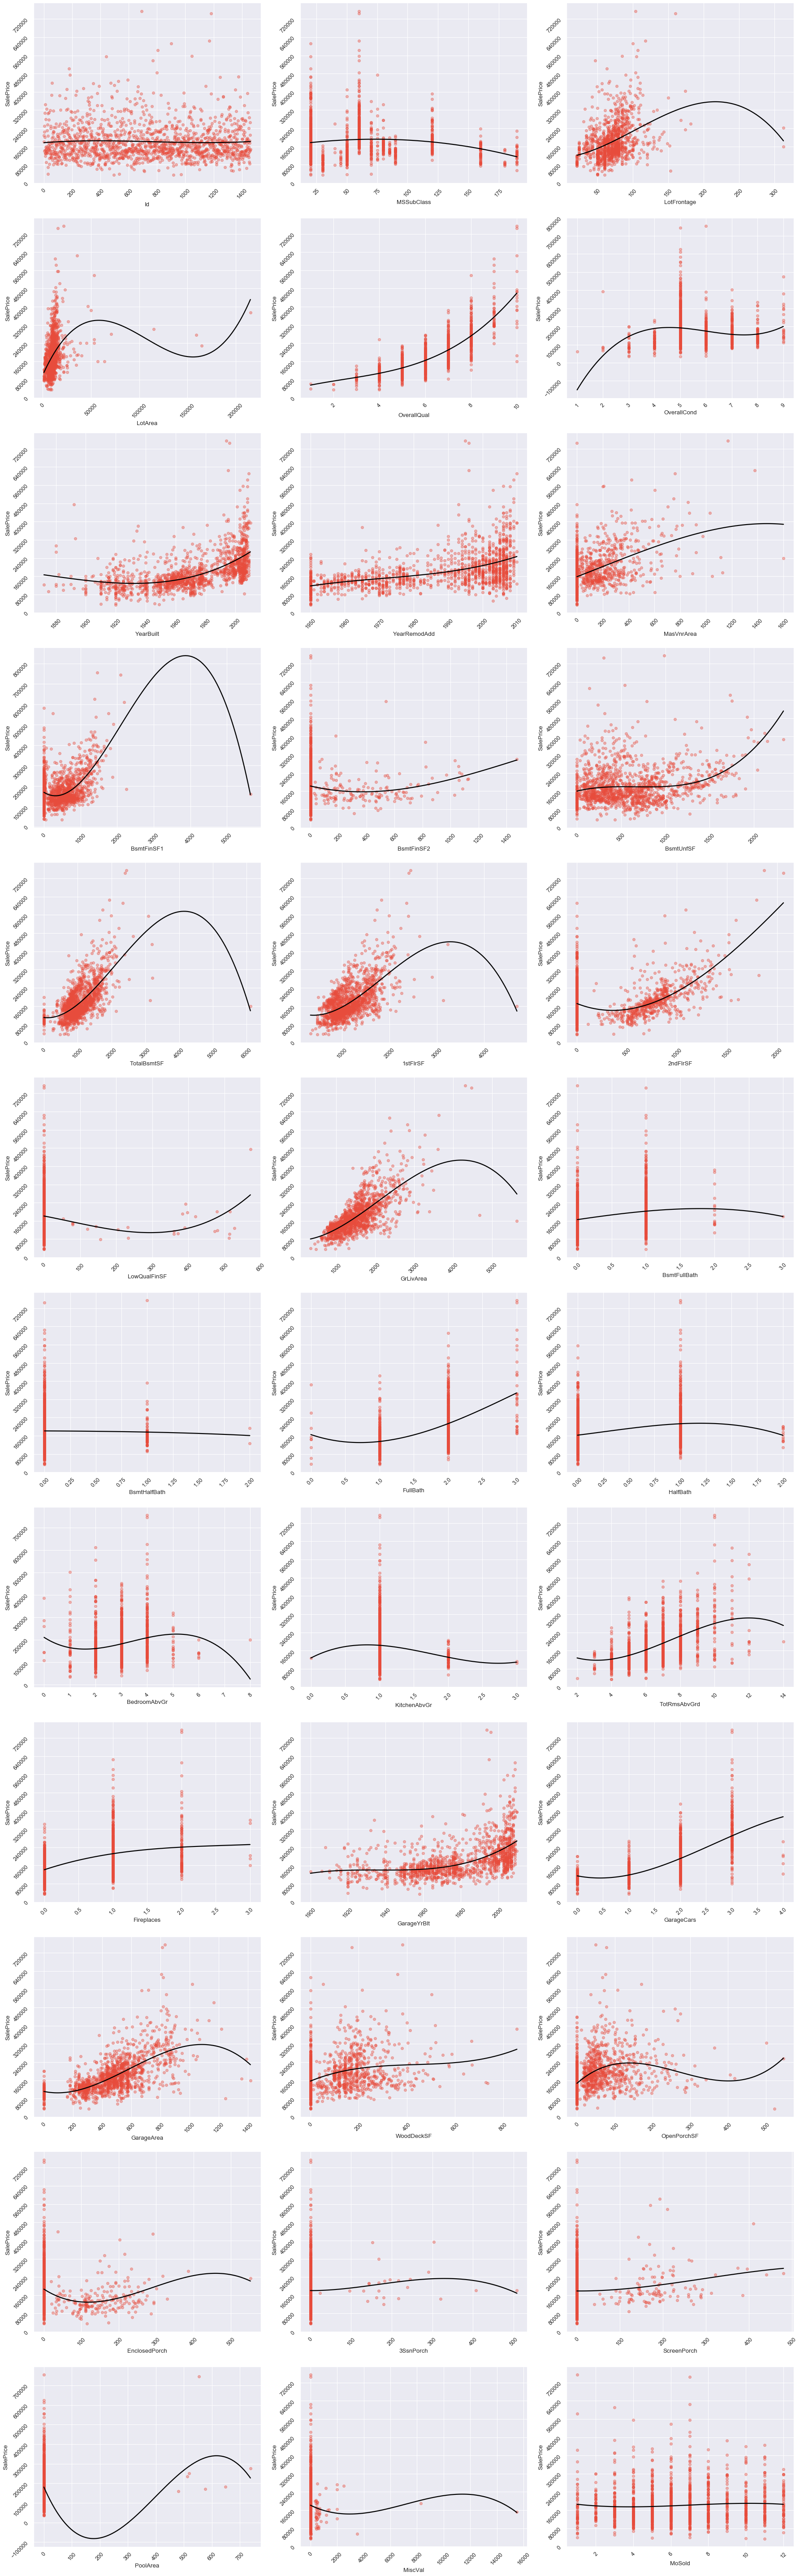

In [15]:
srt_reg('SalePrice', train_data)

In [16]:
from scipy.stats import probplot

def plot_dist3(df, feature, title):
    
    # Creating a customized chart. and giving in figsize and everything.
    
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    
    # creating a grid of 3 cols and 3 rows.
    
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    
    ax1 = fig.add_subplot(grid[0, :2])
    
    # Set the title.
    
    ax1.set_title('Histogram')
    
    # plot the histogram.
    
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=ax1,
                 color='#e74c3c')
    ax1.legend(labels=['Normal', 'Actual'])

    # customizing the QQ_plot.
    
    ax2 = fig.add_subplot(grid[1, :2])
    
    # Set the title.
    
    ax2.set_title('Probability Plot')
    
    # Plotting the QQ_Plot.
    probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)

    # Customizing the Box Plot:
    
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    
    ax3.set_title('Box Plot')
    
    # Plotting the box plot.
    
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.suptitle(f'{title}', fontsize=24)

In [17]:
# Checking target variable.

plot_dist3(train_data.join(y), 'SalePrice', 'Sale Price Before Log Transformation')

ValueError: columns overlap but no suffix specified: Index(['SalePrice'], dtype='object')

In [20]:
# Setting model data.

X = train_data
X_test = test_data
y = np.log1p(y)

In [21]:
plot_dist3(train_data.join(y), 'SalePrice', 'Sale Price After Log Transformation')

ValueError: columns overlap but no suffix specified: Index(['SalePrice'], dtype='object')

In [23]:
pd.set_option("display.max_columns", 81)

features.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [25]:
features.isnull().any()

Id               False
MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType          True
SaleCondition    False
SalePrice         True
Length: 81, dtype: bool